# Limpieza del dataset
Hacemos la carga inicial del dataset y un análisis incial

In [1]:
import pandas as pd

# This assumes you have a file named 'california_housing.csv' in a 'resources' folder.
# You would need to uncomment the lines below to run them.

file_path = '../resources/Supplement_Sales_Weekly_Expanded.csv'
try:
    df_revenue = pd.read_csv(file_path)
    print("Successfully loaded DataFrame from CSV:")
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")



# You can now work with the DataFrame 'df'.
# Let's display its info to verify it matches the description in the markdown file.
print("DataFrame Info:")
df_revenue.info()

print("\nFirst 5 rows of the DataFrame:")
print(df_revenue.head())


Successfully loaded DataFrame from CSV:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB

First 5 rows of the DataFrame:
         Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.

El análisis no muestra valores nulos. Pasamos a buscar potenciales valores anómalos

# Analisis de valores anomalos

Generating box plots to visually inspect for outliers...


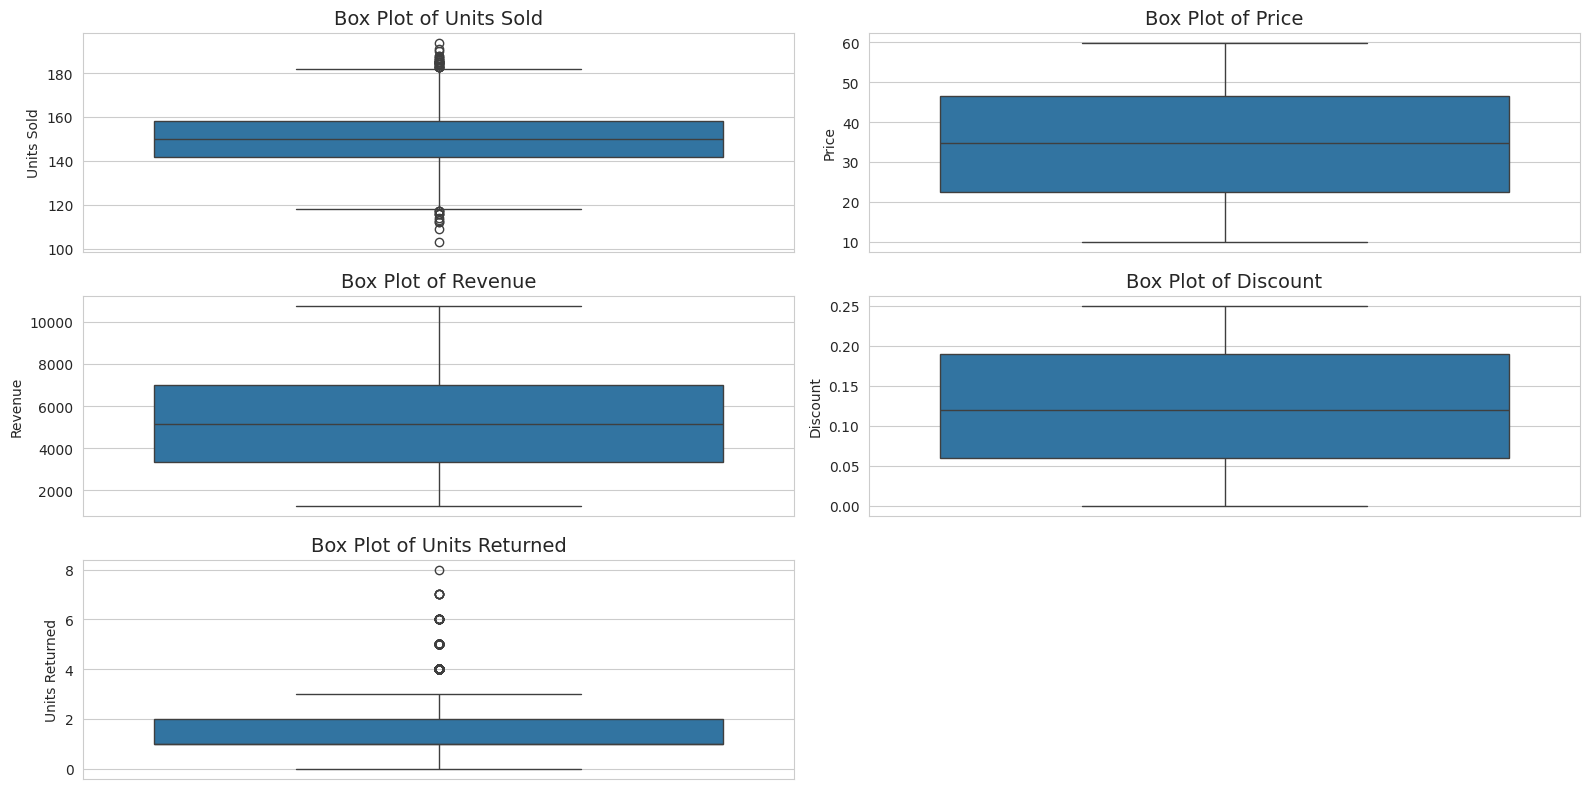

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Outlier Detection Code ---

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Select a few features to inspect for outliers
features_to_plot = ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']

print("Generating box plots to visually inspect for outliers...")

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i + 1 )
    sns.boxplot(y=df_revenue[feature])
    plt.title(f'Box Plot of {feature}', fontsize=14)

plt.tight_layout()
plt.show()


Los gráficos de Box Plot muestran valores atípicos pra las unidades devueltas (superior a 4 unidades devueltas) y para unidades vendidas (mas de 180 y menos de 120). Esto no significa que los datos esten mal, si no que hay productos que se venden mas o menos que otros que otros y que hay productos que se devuelven mas que otros. Pasemos a analizar con mas detalle esos productos.

In [3]:
import pandas as pd
from sklearn.calibration import column_or_1d

column = 'Units Sold'

Q1 = df_revenue[column].quantile(0.25)
Q3 = df_revenue[column].quantile(0.75)
IQR = Q3 - Q1

# Outliers limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df_revenue[(df_revenue[column] < lower_bound) | (df_revenue[column] > upper_bound)]

print(f"Outliers detectados para '{column}': {len(outliers)}")
print(outliers)

Outliers detectados para 'Units Sold': 40
            Date        Product Name     Category  Units Sold  Price  \
71    2020-02-03                Zinc      Mineral         184  36.17   
109   2020-02-17   Green Tea Extract   Fat Burner         117  26.94   
131   2020-03-02        Multivitamin      Vitamin         184  11.95   
212   2020-04-06         Pre-Workout  Performance         116  53.34   
223   2020-04-06  Electrolyte Powder    Hydration         185  43.15   
247   2020-04-20                Zinc      Mineral         188  30.18   
465   2020-07-27           Vitamin C      Vitamin         183  33.92   
722   2020-11-16            Fish Oil        Omega         194  51.09   
766   2020-11-30     Iron Supplement      Mineral         184  24.97   
794   2020-12-14         Ashwagandha       Herbal         185  26.93   
906   2021-02-01         Ashwagandha       Herbal         186  34.74   
1123  2021-05-10        Multivitamin      Vitamin         184  12.67   
1279  2021-07-12  Elec

In [4]:
import pandas as pd
from sklearn.calibration import column_or_1d

column = 'Units Returned'

Q1 = df_revenue[column].quantile(0.25)
Q3 = df_revenue[column].quantile(0.75)
IQR = Q3 - Q1

# Outliers limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df_revenue[(df_revenue[column] < lower_bound) | (df_revenue[column] > upper_bound)]

print(f"Outliers detectados para '{column}': {len(outliers)}")
print(outliers)

Outliers detectados para 'Units Returned': 314
            Date       Product Name    Category  Units Sold  Price  Revenue  \
28    2020-01-13             Biotin     Vitamin         161  18.87  3038.07   
33    2020-01-20          Vitamin C     Vitamin         149  22.33  3327.17   
49    2020-01-27          Vitamin C     Vitamin         163  35.90  5851.70   
59    2020-01-27          Melatonin   Sleep Aid         156  38.27  5970.12   
76    2020-02-03             Biotin     Vitamin         162  58.36  9454.32   
...          ...                ...         ...         ...    ...      ...   
4317  2025-03-03  Green Tea Extract  Fat Burner         154  48.14  7413.56   
4321  2025-03-10          Vitamin C     Vitamin         166  44.32  7357.12   
4353  2025-03-24          Vitamin C     Vitamin         136  58.55  7962.80   
4363  2025-03-24          Melatonin   Sleep Aid         178  13.04  2321.12   
4370  2025-03-31           Fish Oil       Omega         139  44.67  6209.13   

    

No podemos determinar si los datos son erroneos o no. Ventas mayores o menores de lo normal se puede deber a la calidad del producto vendido o a descuentos promocionales. 

Lo mismo se puede decir para las unidades devueltas.

**Conclusión.** Los valores anómalos detectados se consideran validos y no se van a a eliminar o borrar.

# Entrenamiento del modelo para predecir ingresos

Como nuestro objetivo es predecir ingresos, debemos eliminar todas las columnas que esten relacionadas con los ingresos como pueden ser el precio unitario, los descuentos, las devoluciones... Para ello, vamos a comparar los ingresos con el resto de las variables para ver cuales de ellas podrian ser utiles para entrenar nuestro modelo.

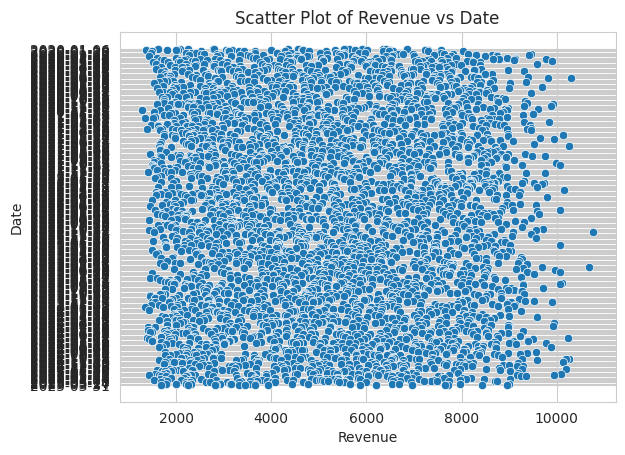

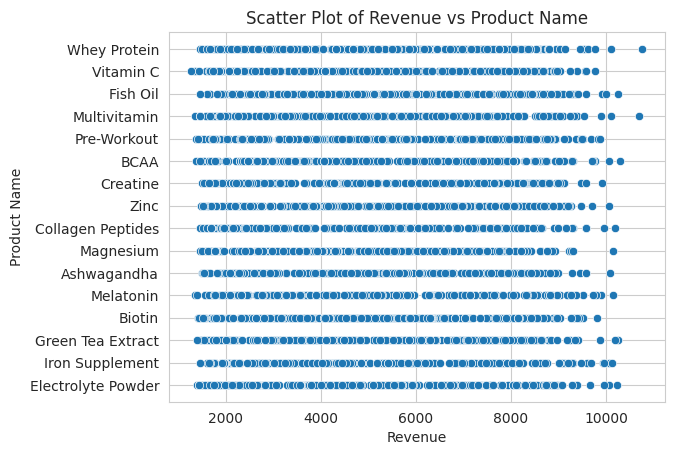

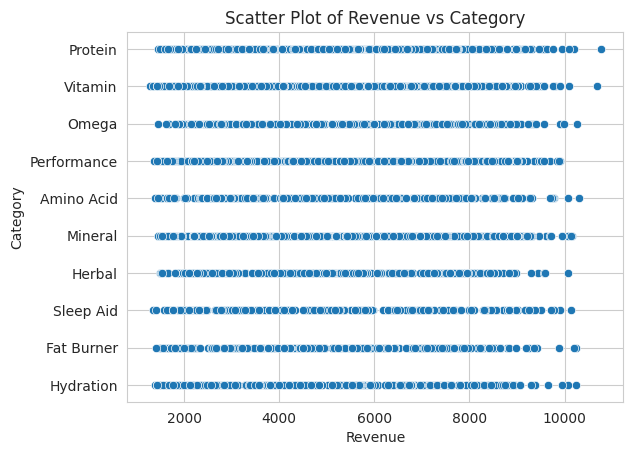

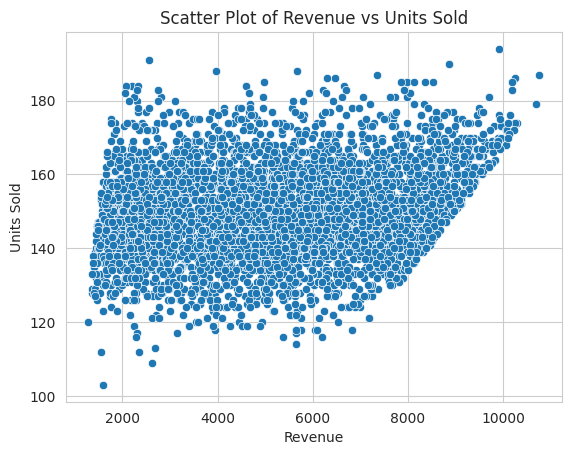

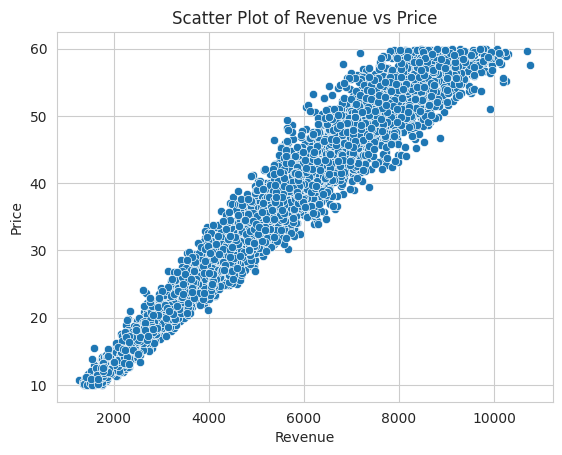

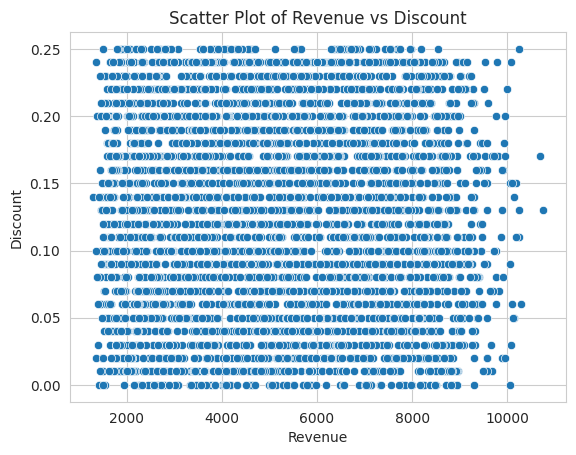

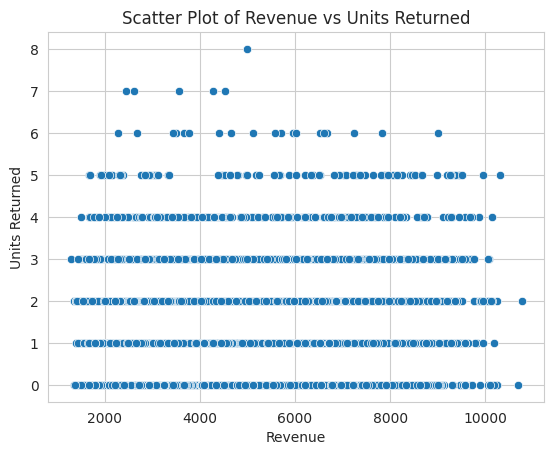

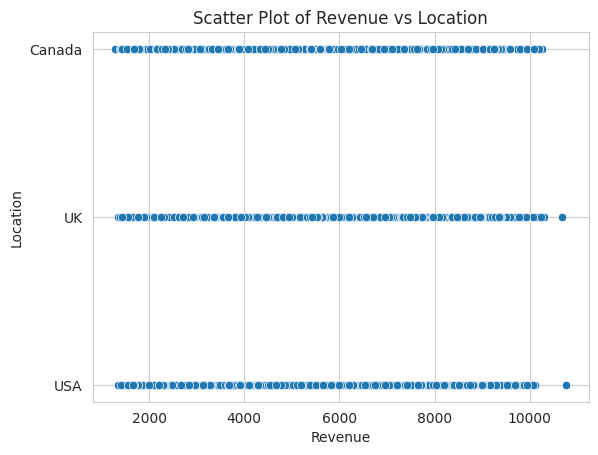

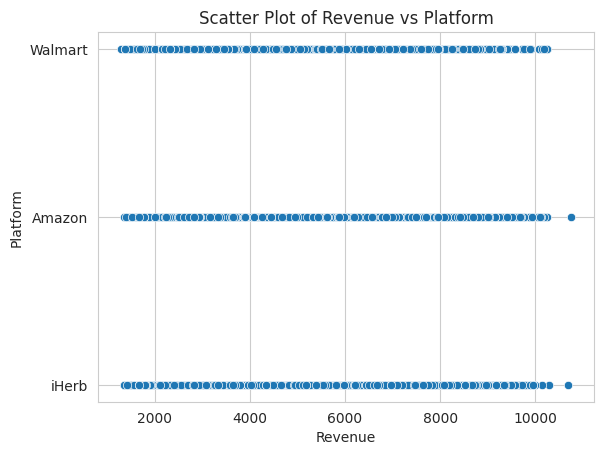

In [5]:
for field in df_revenue.columns:
    if field == 'Revenue':
        continue

    sns.scatterplot(x='Revenue', y=field, data=df_revenue)
    plt.title(f'Scatter Plot of Revenue vs {field}')
    plt.show()

Podemos ver que solo las unidades vendidas y el precio muestran alguna tendencia de correlación. Sin embargo en nuestro dataset, las ganancias se pueden calcular multiplicando las unidades vendidas por el precio, por lo que no podemos incluirlas en nuestro modelo (como mucho, incluir una de las dos). El resto de las distribuciones sugieren que no existe correlación ninguna entre ellas, con lo que no nos van a aportar nada. Podemos eliminarlas de nuestro modelo. Vamos a dejar de momento la variable fecha para ver si podemos sacar algo de ella. Tambien de las variables precio y unidades vendidas, nos vamos a quedar con la primera puesto que es la que mejor se ajusta a una regresion lineal.

In [6]:
# Drop columns that can affect the revenue
# columns_to_drop = ['Units Sold', 'Price', 'Discount', 'Units Returned']
# columns_to_drop = ['Units Sold', 'Price', 'Discount', 'Units Returned', 'Product Name', 'Category', 'Platform', 'Location']
# columns_to_drop = ['Units Sold', 'Price']
columns_to_drop = ['Units Sold', 'Platform', 'Location', 'Category', 'Product Name']

df_revenue = df_revenue.drop(columns=columns_to_drop)

display(df_revenue)

,Date,Price,Revenue,Discount,Units Returned
0,2020-01-06,31.98,4573.14,0.03,2
1,2020-01-06,42.51,5908.89,0.04,0
2,2020-01-06,12.91,2078.51,0.25,0
3,2020-01-06,16.07,2249.80,0.08,0
4,2020-01-06,35.47,5568.79,0.25,3
...,...,...,...,...,...
4379,2025-03-31,47.79,7646.40,0.21,1
4380,2025-03-31,38.12,5870.48,0.22,1
4381,2025-03-31,20.40,2835.60,0.12,3
4382,2025-03-31,18.31,2819.74,0.23,2


No podemos procesar texto en los modelos, por lo que asignaremos un número a cada uno de los valores categóricos. Existe en pandas un método llamado `get_dummies` que convierte los valores categóricos en una o mas columnas a valores binarios (o a Os y 1s).

In [7]:
# # Convert categoric columns to boolean values
# df_revenue = pd.get_dummies(df_revenue, columns=['Product Name', 'Category', 'Location', 'Platform'], dtype=int)

# display(df_revenue)

Para el caso de las fechas, podemos crear los siguientes valores numéricos:
- Año
- Día
- Mes
- Día de la semana
- Día del año
- ¿Es fin de semana?

In [8]:
# Convert date to a format Pandas can understand
df_revenue['date'] = pd.to_datetime(df_revenue['Date'])

# Extract year, day, month...
df_revenue['Year'] = df_revenue['date'].dt.year
df_revenue['Month'] = df_revenue['date'].dt.month
df_revenue['Day'] = df_revenue['date'].dt.day
df_revenue['Day Of Week'] = df_revenue['date'].dt.day_of_week + 1 # 1 -> Monday, 7 -> Sunday
df_revenue['Day Of Year'] = df_revenue['date'].dt.day_of_year
df_revenue['Is Weekend'] = (df_revenue['date'].dt.dayofweek >= 6).astype(int)

# Drop the date columns (original and temporal)
df_revenue = df_revenue.drop(columns=['Date', 'date'])

display(df_revenue)



,Price,Revenue,Discount,Units Returned,Year,Month,Day,Day Of Week,Day Of Year,Is Weekend
0,31.98,4573.14,0.03,2,2020,1,6,1,6,0
1,42.51,5908.89,0.04,0,2020,1,6,1,6,0
2,12.91,2078.51,0.25,0,2020,1,6,1,6,0
3,16.07,2249.80,0.08,0,2020,1,6,1,6,0
4,35.47,5568.79,0.25,3,2020,1,6,1,6,0
...,...,...,...,...,...,...,...,...,...,...
4379,47.79,7646.40,0.21,1,2025,3,31,1,90,0
4380,38.12,5870.48,0.22,1,2025,3,31,1,90,0
4381,20.40,2835.60,0.12,3,2025,3,31,1,90,0
4382,18.31,2819.74,0.23,2,2025,3,31,1,90,0


Vamos a analizar los nuevos campos creados a partir de la fecha:

In [9]:
fields = ['Year', 'Month', 'Day', 'Day Of Week', 'Day Of Year', 'Is Weekend']

# Print the unique values for the new fields added using the date
for field in fields:
    print(f"Unique values for '{field}': {df_revenue[field].unique()}\n")


Unique values for 'Year': [2020 2021 2022 2023 2024 2025]

Unique values for 'Month': [ 1  2  3  4  5  6  7  8  9 10 11 12]

Unique values for 'Day': [ 6 13 20 27  3 10 17 24  2  9 16 23 30  4 11 18 25  1  8 15 22 29 31  7
 14 21 28  5 12 19 26]

Unique values for 'Day Of Week': [1]

Unique values for 'Day Of Year': [  6  13  20  27  34  41  48  55  62  69  76  83  90  97 104 111 118 125
 132 139 146 153 160 167 174 181 188 195 202 209 216 223 230 237 244 251
 258 265 272 279 286 293 300 307 314 321 328 335 342 349 356 363   4  11
  18  25  32  39  46  53  60  67  74  81  88  95 102 109 116 123 130 137
 144 151 158 165 172 179 186 193 200 207 214 221 228 235 242 249 256 263
 270 277 284 291 298 305 312 319 326 333 340 347 354 361   3  10  17  24
  31  38  45  52  59  66  73  80  87  94 101 108 115 122 129 136 143 150
 157 164 171 178 185 192 199 206 213 220 227 234 241 248 255 262 269 276
 283 290 297 304 311 318 325 332 339 346 353 360   2   9  16  23  30  37
  44  51  58  65  72  79 

Observamos que `Day Of Week` es siempre 1 (Lunes), lo que nos indica que los datos se han recogido de formal semanal (cada Lunes). Lo mismo ocurre para la variable `Is Weekend` Los eliminamos de nuestro modelo.

Ya hemos preparado los datos para que puedan ser usados en un modelo (convertido los datos categoricos a valores booleanos). Vamos a pasar ahora a crear:
- Dataset para la variable dependiente:
    - Datos de entrenamiento
    - Datos de test
- Dataset para las variables independientes:
    - Datos de entrenamiento
    - Datos de test

In [10]:

from pyparsing import col

# Drop columns
df_revenue = df_revenue.drop(columns=['Day Of Week', 'Is Weekend'])

# Create the list of dependent and independent columns
dependent = ['Revenue']
independent = []

for column in df_revenue.columns:
    if column not in dependent:
        independent.append(column)


print("The following are the dependent and independent variables for our model:\n")
print(f"    -Dependent: {dependent}")
print(f"    -Independent: {independent}")

The following are the dependent and independent variables for our model:

    -Dependent: ['Revenue']
    -Independent: ['Price', 'Discount', 'Units Returned', 'Year', 'Month', 'Day', 'Day Of Year']


Veamos la matriz de correlación y las relaciones de los ingresos con nuestras nuevas variables con la esperanza de encontrar alguna correlación:

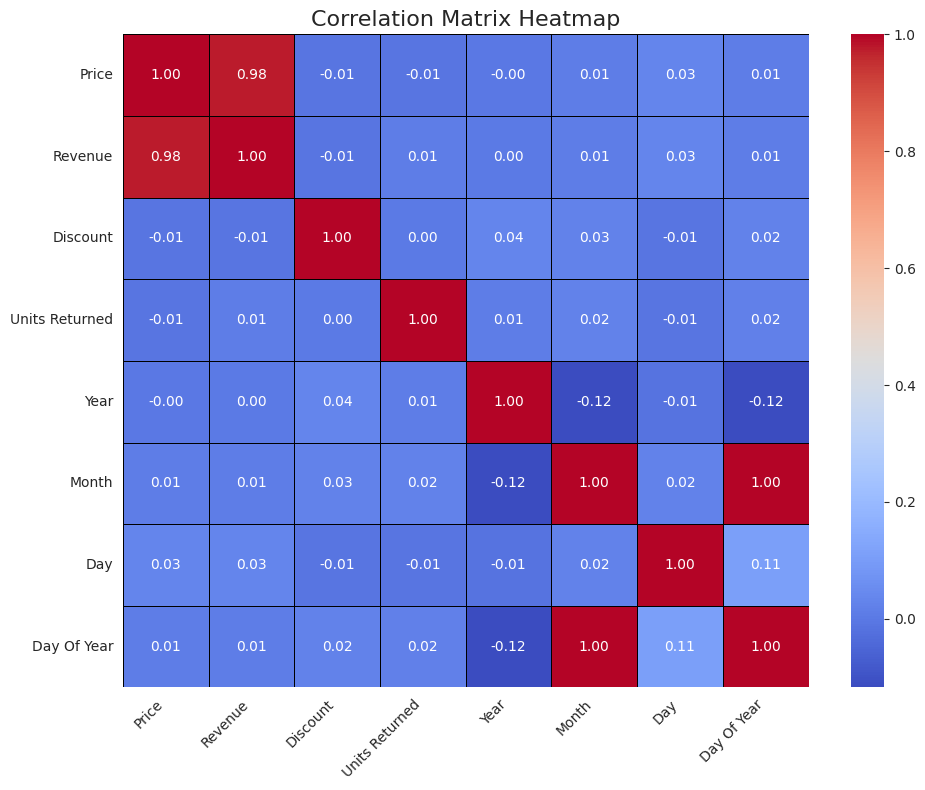

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# The .corr() method returns a DataFrame with the correlation coefficients
corr_matrix = df_revenue.corr()

# 3. Create a heatmap to visualize the matrix
# sns.heatmap() is a function from the seaborn library
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 4. Display or save the plot
plt.show()
# Or to save it to a file:
# plt.savefig('correlation_matrix_heatmap.png')

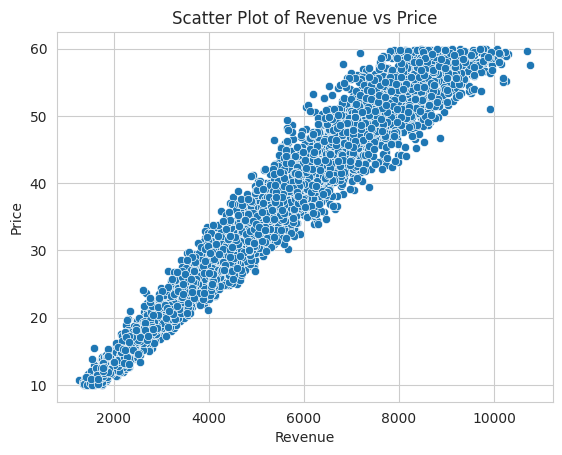

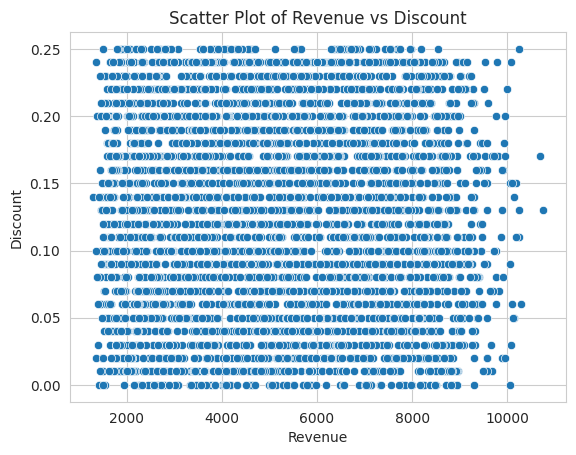

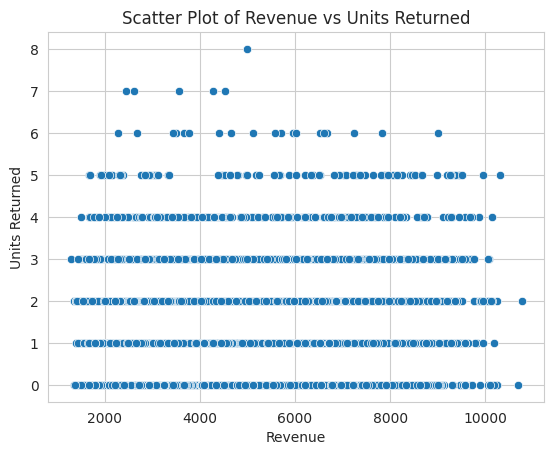

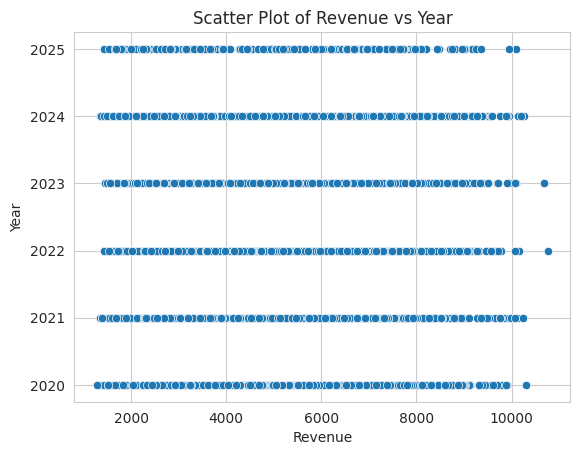

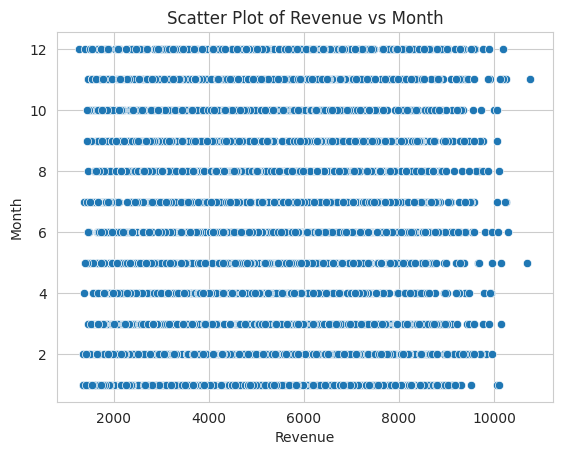

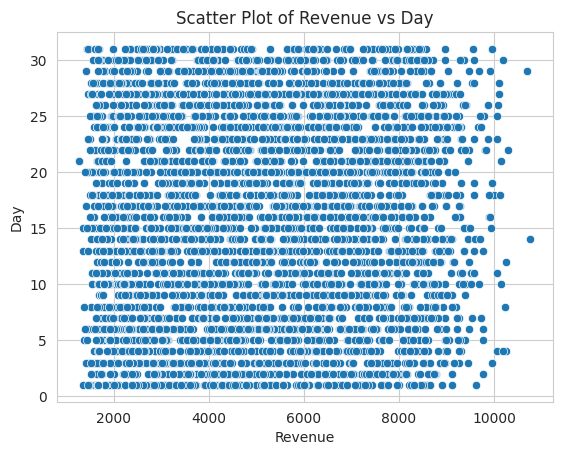

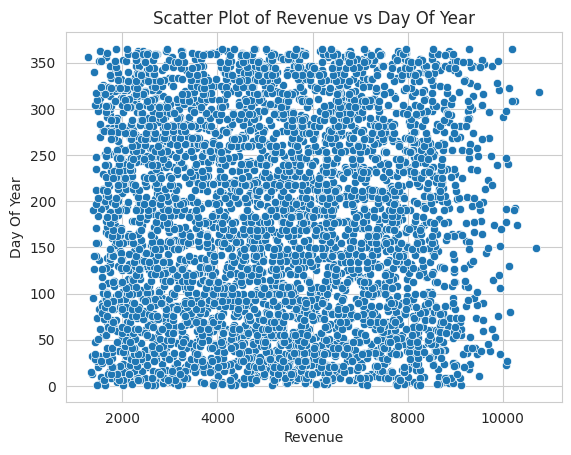

In [12]:
for field in independent:
    sns.scatterplot(x=dependent[0], y=field, data=df_revenue)
    plt.title(f'Scatter Plot of {dependent[0]} vs {field}')
    plt.show()

Podemos ver en la matriz de correlación que los datos no muestran gran correlación entre ellos exceptuando para el mes y el dia del año. Las graficas de relacion de los ingresos con el resto de las variables muestran que no hay relacion ninguna entre ellas, con lo que podemos descartar los modelos de regresión lineal.

Eliminamos El dia del año del modelo y procedemos a mostrar la grafica de correlación de nuevo:


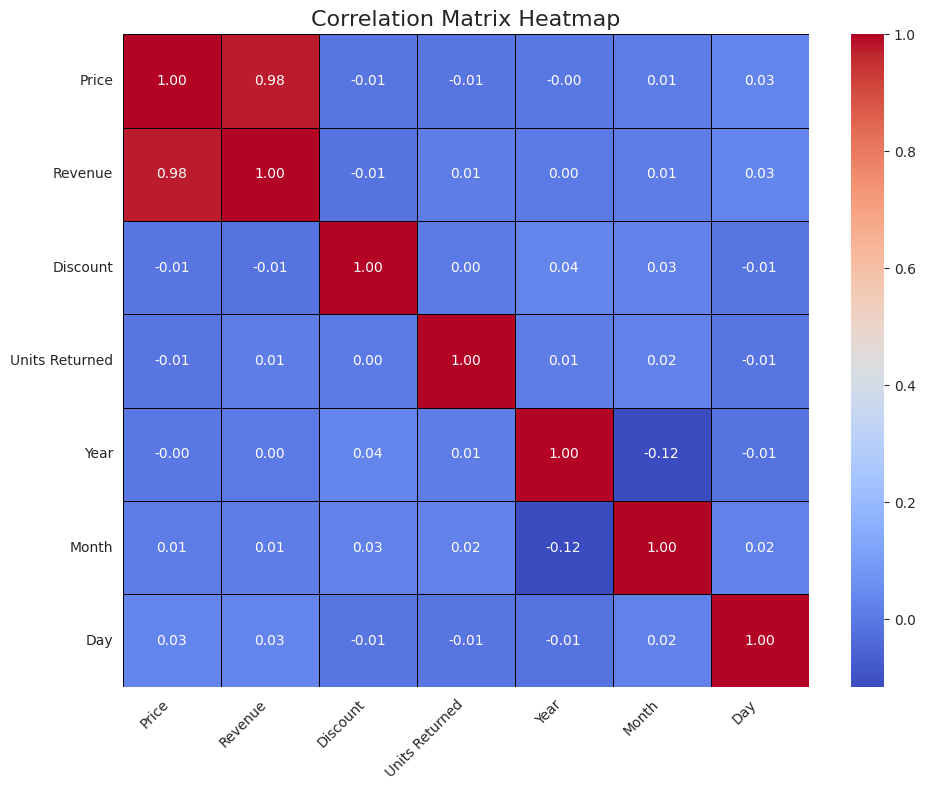

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_revenue = df_revenue.drop(columns=['Day Of Year'])

# Calculate the correlation matrix
# The .corr() method returns a DataFrame with the correlation coefficients
corr_matrix = df_revenue.corr()

# 3. Create a heatmap to visualize the matrix
# sns.heatmap() is a function from the seaborn library
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 4. Display or save the plot
plt.show()
# Or to save it to a file:
# plt.savefig('correlation_matrix_heatmap.png')

Analizando la nueva matriz de correlación, vemos que la única variable que parece correlacionada es 'Precio' y en menor medida, 'días' y mes. Vamos a eliminar todas las variables que tengan una correlacion en valor absoluto menor que 0.02

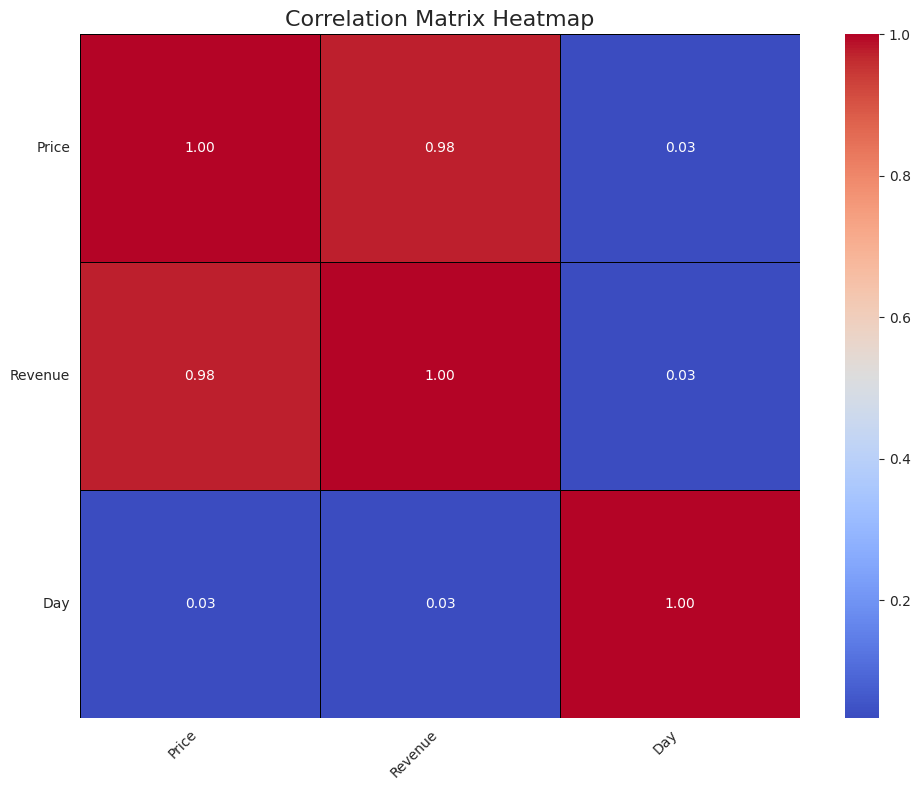

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_revenue = df_revenue.drop(columns=['Discount','Units Returned', 'Year', 'Month'])

# Calculate the correlation matrix
# The .corr() method returns a DataFrame with the correlation coefficients
corr_matrix = df_revenue.corr()

# 3. Create a heatmap to visualize the matrix
# sns.heatmap() is a function from the seaborn library
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 4. Display or save the plot
plt.show()
# Or to save it to a file:
# plt.savefig('correlation_matrix_heatmap.png')

Preparamos el modelo:

In [15]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

# Create the list of dependent and independent columns
dependent = ['Revenue']
independent = []

for column in df_revenue.columns:
    if column not in dependent:
        independent.append(column)


print("The following are the dependent and independent variables for our model:\n")
print(f"    -Dependent: {dependent}")
print(f"    -Independent: {independent}")

# Create datasets for independent and dependent variables
X = df_revenue[independent]
y = df_revenue[dependent]

# Scale the independent variables
# numeric_columns = ['Year', 'Month', 'Day', 'Day Of Year']
# boolean_colums = []
# for column in X.columns:
#     if column not in numeric_columns:
#         boolean_colums.append(column)

# numeric_transformer = StandardScaler()

# preprocessor = ColumnTransformer(
#     [
#         ('num', numeric_transformer, numeric_columns),
#         ('bool', 'passthrough', boolean_colums)
#     ]
# )

preprocessor = StandardScaler()

X_transformed = preprocessor.fit_transform(X)

# Split datasets for training and test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

The following are the dependent and independent variables for our model:

    -Dependent: ['Revenue']
    -Independent: ['Price', 'Day']
X_train shape: (3945, 2)
X_test shape: (439, 2)
y_train shape: (3945, 1)
y_test shape: (439, 1)


Entrenamos el modelo con Lasso y mostramos las métricas:

In [16]:
# Create the LassoCV model
# The `cv` parameter specifies the number of cross-validation folds
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score


model = LassoCV(cv=10, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train['Revenue'])

# Print the optimal alpha found by cross-validation
print(f"Optimal alpha: {model.alpha_}")

# Create the model
model_lasso = Lasso(alpha=model.alpha_)

# Train the model
model_lasso.fit(X_train, y_train['Revenue'])

# Make predictions on the test set
y_pred = model_lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse:.2f}")
print(f"R-squared (R2) on test set: {r2:.2f}")

# Print the model coefficients
# Lasso will set some coefficients to exactly zero, performing feature selection
print("\nModel Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i}: {coef:.4f}")

Optimal alpha: 5.314743733257825
Mean Squared Error (MSE) on test set: 236918.53
R-squared (R2) on test set: 0.95

Model Coefficients:
Feature 0: 2141.4416
Feature 1: -0.0000


Podemos ver que los resultados son buenos (R² de 0.95) lo que sugiere que estamos usando un buen conjunto de datos. Vamos a entrenar el modelo con Ridge:

In [17]:
# Create a list of alpha values to test
from sklearn.linear_model import Ridge, RidgeCV


alphas = np.logspace(-6, 6, 13)

# Create the RidgeCV model
# The `alphas` parameter provides the list of alpha values to search
# The `cv` parameter specifies the number of cross-validation folds
model = RidgeCV(alphas=alphas, cv=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the optimal alpha found by cross-validation
print(f"Optimal alpha: {model.alpha_}\n")

# Create the model
model_ridge = Ridge(alpha=model.alpha_)

# Train the model
model_ridge.fit(X_train, y_train['Revenue'])

# Make predictions on the test set
y_pred = model_ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse:.2f}")
print(f"R-squared (R2) on test set: {r2:.2f}")

# Print the model coefficients
print("\nModel Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i}: {coef:.4f}")

Optimal alpha: 1e-06

Mean Squared Error (MSE) on test set: 237380.23
R-squared (R2) on test set: 0.95

Model Coefficients:
Feature 0: 2146.7839
Feature 1: -0.6879


Vemos que tampoco arroja Los mismos resultados que Lasso. Vamos a probar con Elastic-Net:

In [18]:
# Create a list of l1_ratio values to test
# A value of 0 is Ridge, 1 is Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV


l1_ratios = np.linspace(0.1, 1, 10)

# Create the ElasticNetCV model
# The `l1_ratio` parameter provides the list of mixing parameters to search
# The `cv` parameter specifies the number of cross-validation folds
model = ElasticNetCV(l1_ratio=l1_ratios, cv=5, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train['Revenue'])

# Print the optimal alpha and l1_ratio found by cross-validation
print(f"Optimal alpha: {model.alpha_:.4f}")
print(f"Optimal l1_ratio: {model.l1_ratio_:.2f}")

# Create the model
model_elastic = ElasticNet(alpha=model.alpha_, l1_ratio=model.l1_ratio_)

# Train the model
model_elastic.fit(X_train, y_train['Revenue'])

# Make predictions on the test set
y_pred = model_elastic.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse:.2f}")
print(f"R-squared (R2) on test set: {r2:.2f}")

# Print the model coefficients
print("\nModel Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i}: {coef:.4f}")

Optimal alpha: 3.2611
Optimal l1_ratio: 1.00
Mean Squared Error (MSE) on test set: 237084.86
R-squared (R2) on test set: 0.95

Model Coefficients:
Feature 0: 2143.4964
Feature 1: -0.0000


Vemos que nos arroja los mismos resultados que los otros dos modelos. Veamos una comparativa visual:

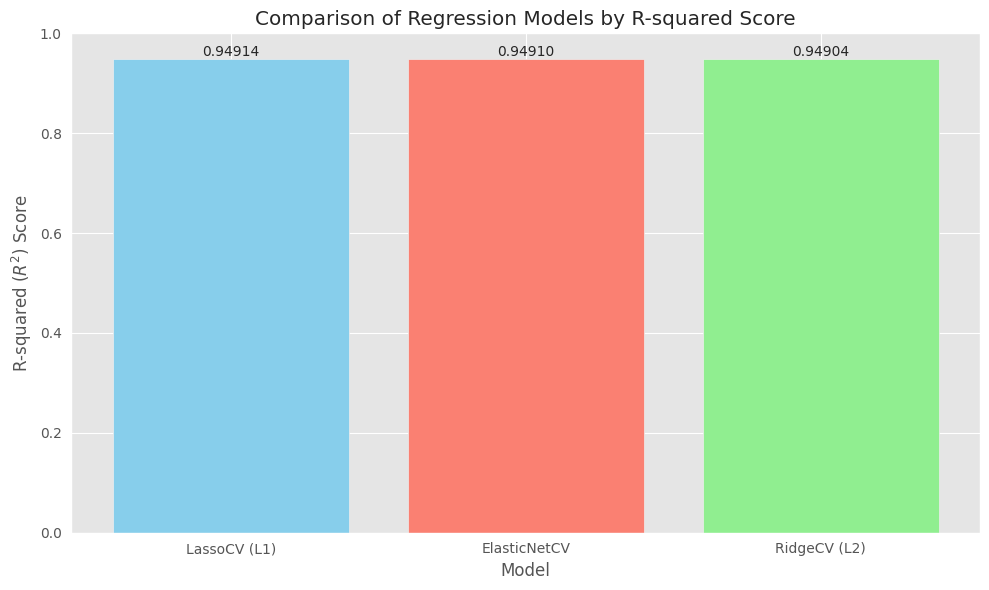

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# Dictionary to store the models
models = {
    'LassoCV (L1)': model_lasso,
    'RidgeCV (L2)': model_ridge,
    'ElasticNetCV': model_elastic,
}

r2_scores = {}

# 3. Train, predict, and evaluate each model to get R-squared scores
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

# 4. Create a DataFrame from the scores and sort it for the plot
scores_df = pd.DataFrame(r2_scores.items(), columns=['Model', 'R2 Score'])
scores_df = scores_df.sort_values(by='R2 Score', ascending=False)

# 5. Create the bar chart using Matplotlib
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
bars = plt.bar(scores_df['Model'], scores_df['R2 Score'], color=['skyblue', 'salmon', 'lightgreen', 'purple'])

# Add labels and title
plt.title('Comparison of Regression Models by R-squared Score')
plt.xlabel('Model')
plt.ylabel('R-squared ($R^2$) Score')
plt.ylim(0, 1)

# Add R^2 values on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.5f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# 6. Save the plot to a file
# plt.savefig('model_r2_comparison.png')

# print("Graph saved as model_r2_comparison.png")

# Conclusiones.
Todos los modelos probados son muy robustos y precisos para este conjunto de datos. No hay un claro ganador entre ellos, ya que sus rendimientos son casi idénticos. Esto te da flexibilidad para elegir el modelo que mejor se adapte a tus necesidades específicas, por ejemplo, uno que sea más rápido de entrenar o más fácil de interpretar.

Para nuestro caso particular, nos hemos decantado por el modelo Ridge porque no descarta la variable día.

Por último, vamos a guardar los modelos entrenados para poder usarlos luego con una API sin necesidad de entrenarlos de nuevo.

In [20]:
import joblib

joblib.dump(model_lasso, '../resources/revenue-model_lasso.joblib')
joblib.dump(model_ridge, '../resources/revenue-model_ridge.joblib')
joblib.dump(model_elastic, '../resources/revenue-model_elastic.joblib')
joblib.dump(preprocessor, '../resources/revenue-standard_scaler.joblib')


['../resources/revenue-standard_scaler.joblib']